In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os
import sys
#import xgboost
from IPython.display import display, HTML

%matplotlib inline

In [3]:
CURR_PATH = os.path.dirname(os.path.abspath('__file__'))
ROOT =  os.path.join(CURR_PATH)
FIG =  os.path.join(CURR_PATH,'fig')
sys.path.append(os.path.join(ROOT,'modules'))

import style as style
style.set_style()

import plot as pl

import features as feat

Style set


In [16]:
fn = 'quote=VOLV-BHM-B&start=2017-09-08&end=2017-10-19&interval=2min.pkl'
df = pd.read_pickle(os.path.join('data',fn))
stocks = df['stock'].unique()
df_arr = {}
for stock in stocks:
    print(stock)
    df_arr[stock] = df[df['stock']==stock]

VOLV-B
HM-B


In [17]:
for stock in stocks:
    print(stock)
    df = df_arr[stock]
    df_arr[stock] = (
        df_arr[stock].groupby([df_arr[stock]['datetime'].dt.date,
                               df_arr[stock]['datetime'].dt.time]).mean()
        .reset_index(level=0).rename(columns={'datetime':'date'})
        .reset_index().rename(columns={'datetime':'time'})
        .set_index(['time','date'])
        .unstack(level=1)
        )
    ticks = len(df_arr[stock].index)
    days = len(df_arr[stock]['open'].columns)
    ticks_thresh = round(ticks*0.1) #DROP DAYS WITH MORE THAN 10% MISSING VALUES
    df_arr[stock].dropna(thresh=ticks-ticks_thresh, axis=1,inplace=True)  #DROP DAYS WITH MORE THAN 10% MISSING VALUES
    df_arr[stock].bfill(inplace=True)
    df_arr[stock].ffill(inplace=True)
    print('Days:\t\t',days)
    days_used = len(df_arr[stock]['open'].columns)
    print('Days droped:\t',days-days_used)
    df_arr[stock].head()

VOLV-B
Days:		 30
Days droped:	 2
HM-B
Days:		 30
Days droped:	 0


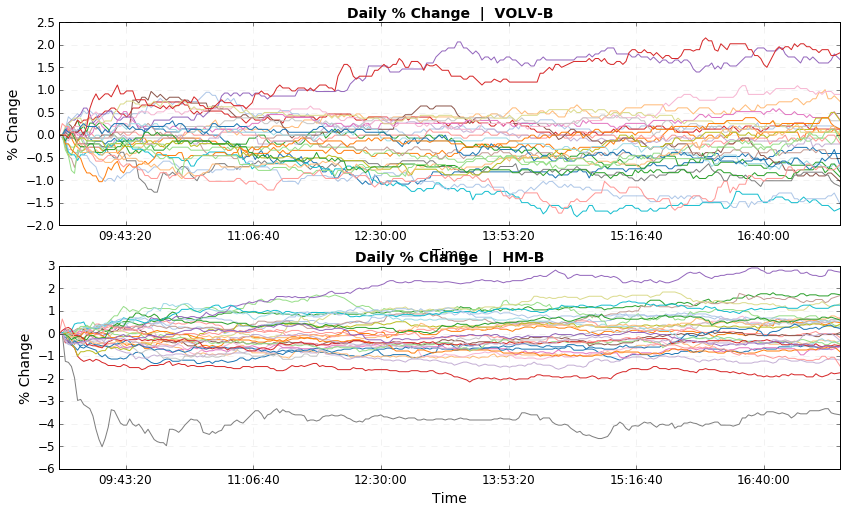

In [20]:
fig, ax = plt.subplots(2,1)
for i, stock in enumerate(stocks):
    first_trade = df_arr[stock].iloc[0,:]
    df_daily_norm = (df_arr[stock]/first_trade-1)*100
    df_daily_norm.loc[:,'high'].plot(ax = ax[i],legend=False,grid='on',title='Daily % Change  |  '+str(stock))
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('% Change')